In [1]:
import warnings
import itertools
import numpy as np
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")
plt.style.use('fivethirtyeight')
import pandas as pd
import statsmodels.api as sm
import matplotlib
matplotlib.rcParams['axes.labelsize'] = 14
matplotlib.rcParams['xtick.labelsize'] = 12
matplotlib.rcParams['ytick.labelsize'] = 12
matplotlib.rcParams['text.color'] = 'k'

In [2]:
df_sales = pd.read_csv("./Sales_Multiseries_training.csv")


In [3]:
df_sales.head()

,Store,Date,Sales,Store_Size,Num_Employees,Returns_Pct,Num_Customers,Pct_On_Sale,Marketing,Near_Xmas,Near_BlackFriday,Holiday,DestinationEvent,Pct_Promotional,Econ_ChangeGDP,EconJobsChange,AnnualizedCPI
0,Louisville,07/01/12,76819.40,20100,42,1.03,327,9.96,July In Store Credit Card Signup Discount; In ...,0,0,No,No,0.000047,0.5,NaN,0.02
1,Louisville,07/02/12,78963.86,20100,21,0.41,293,8.65,July In Store Credit Card Signup Discount; In ...,0,0,No,No,0.000047,NaN,NaN,NaN
2,Louisville,07/03/12,74824.71,20100,26,0.31,356,8.96,July In Store Credit Card Signup Discount; In ...,0,0,No,No,0.000047,NaN,NaN,NaN
3,Louisville,07/04/12,78523.92,20100,33,0.83,350,10.08,July In Store Credit Card Signup Discount; In ...,0,0,Yes,No,0.000047,NaN,NaN,NaN
4,Louisville,07/05/12,76445.90,20100,38,0.51,299,9.80,July In Store Credit Card Signup Discount; ID5...,0,0,No,No,0.000047,NaN,NaN,NaN


In [62]:
df_sales.describe()

,Sales,Store_Size,Num_Employees,Returns_Pct,Num_Customers,Pct_On_Sale,Near_Xmas,Near_BlackFriday,Pct_Promotional,Econ_ChangeGDP,EconJobsChange,AnnualizedCPI
count,7140.000000,7140.000000,7140.000000,7140.000000,7140.000000,7130.000000,7140.000000,7140.000000,7140.000000,80.00000,1020.000000,240.000000
mean,78534.278832,16910.000000,35.048739,0.769146,269.444258,11.711823,2.691877,0.179272,0.065318,1.76250,-590.686275,0.019447
std,27445.616100,1927.023634,19.238847,0.469912,226.393313,3.861841,6.958566,0.965183,0.033369,1.84661,5970.650044,0.025387
min,0.000000,13400.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.001119,-1.20000,-26000.000000,-0.034766
25%,61759.032500,15700.000000,23.000000,0.440000,154.000000,8.940000,0.000000,0.000000,0.047338,0.40000,-4250.000000,0.009091
50%,70776.860000,16750.000000,31.000000,0.680000,207.000000,10.940000,0.000000,0.000000,0.058358,1.80000,-250.000000,0.020241
75%,85319.047500,18800.000000,41.000000,1.000000,287.000000,13.717500,0.000000,0.000000,0.075387,3.32500,3000.000000,0.028015
max,324414.440000,20100.000000,214.000000,3.090000,2268.000000,31.070000,31.000000,8.000000,0.163078,4.00000,16500.000000,0.073502


In [4]:

df_sales.Date = pd.to_datetime(df_sales.Date, format='%m/%d/%y')
df_sales['year'] = pd.DatetimeIndex(df_sales.Date).year
df_sales['month'] = pd.DatetimeIndex(df_sales.Date).month
df_sales['day'] = pd.DatetimeIndex(df_sales.Date).day
df_sales['dayOfWeek'] = pd.DatetimeIndex(df_sales.Date).dayofweek
df_sales['quarter'] = pd.DatetimeIndex(df_sales.Date).quarter

In [5]:
df_sales.Date = pd.to_datetime(df_sales.Date, format='%m/%d/%y')

In [6]:
df_sales = df_sales.sort_values('Date')

In [7]:
df_sales

,Store,Date,Sales,Store_Size,Num_Employees,Returns_Pct,Num_Customers,Pct_On_Sale,Marketing,Near_Xmas,...,DestinationEvent,Pct_Promotional,Econ_ChangeGDP,EconJobsChange,AnnualizedCPI,year,month,day,dayOfWeek,quarter
0,Louisville,2012-07-01,76819.40,20100,42,1.03,327,9.96,July In Store Credit Card Signup Discount; In ...,0,...,No,0.000047,0.5,NaN,0.02,2012,7,1,6,3
1428,Detroit,2012-07-01,63607.02,16600,34,1.07,271,11.21,July In Store Credit Card Signup Discount; In ...,0,...,No,0.000047,0.5,NaN,0.02,2012,7,1,6,3
2856,Portland,2012-07-01,64430.14,16900,36,1.08,275,11.16,July In Store Credit Card Signup Discount; In ...,0,...,No,0.000047,0.5,NaN,0.02,2012,7,1,6,3
3570,Columbus,2012-07-01,61910.23,16200,31,0.98,264,10.14,July In Store Credit Card Signup Discount; In ...,0,...,No,0.000047,0.5,NaN,0.02,2012,7,1,6,3
714,Philadelphia,2012-07-01,60000.53,15700,27,1.09,256,10.37,July In Store Credit Card Signup Discount; In ...,0,...,No,0.000047,0.5,NaN,0.02,2012,7,1,6,3
6426,San Antonio,2012-07-01,64872.57,17000,40,0.98,276,10.90,July In Store Credit Card Signup Discount; In ...,0,...,No,0.000047,0.5,NaN,0.02,2012,7,1,6,3
4284,Richmond,2012-07-01,51236.73,13400,29,1.11,218,10.56,July In Store Credit Card Signup Discount; In ...,0,...,No,0.000047,0.5,NaN,0.02,2012,7,1,6,3
4998,Lancaster,2012-07-01,71906.19,18800,34,1.07,306,9.76,July In Store Credit Card Signup Discount; In ...,0,...,No,0.000047,0.5,NaN,0.02,2012,7,1,6,3
5712,Baltimore,2012-07-01,57821.02,15100,29,1.15,246,10.11,July In Store Credit Card Signup Discount; In ...,0,...,No,0.000047,0.5,NaN,0.02,2012,7,1,6,3
2142,Savannah,2012-07-01,73917.95,19300,40,1.10,315,11.09,July In Store Credit Card Signup Discount; In ...,0,...,No,0.000047,0.5,NaN,0.02,2012,7,1,6,3


In [8]:
df_sales['Date'].min(),df_sales['Date'].max()

(Timestamp('2012-07-01 00:00:00'), Timestamp('2014-06-14 00:00:00'))

In [9]:
df_sales = df_sales.sort_values('Date')
df_sales = df_sales.set_index('Date')



,quarter,Sales
0,1,1.293441e+08
1,2,1.186686e+08
2,3,1.268237e+08
3,4,1.858983e+08


In [69]:
y = df_sales['Sales'].resample('MS').mean()

In [57]:
y

Date
2012-07-01     66791.016129
2012-08-01     66653.123258
2012-09-01     69412.790800
2012-10-01     76844.969548
2012-11-01    104339.847833
2012-12-01    119779.813806
2013-01-01     84442.794032
2013-02-01     69758.774250
2013-03-01     69675.870323
2013-04-01     68574.455233
2013-05-01     78263.281226
2013-06-01     71931.395733
2013-07-01     70302.190774
2013-08-01     68966.263710
2013-09-01     71529.901500
2013-10-01     75740.714065
2013-11-01    110094.519633
2013-12-01    119789.193065
2014-01-01     79264.339129
2014-02-01     62639.529286
2014-03-01     64270.607968
2014-04-01     68263.136633
2014-05-01     73342.028129
2014-06-01     64573.486143
Freq: MS, Name: Sales, dtype: float64

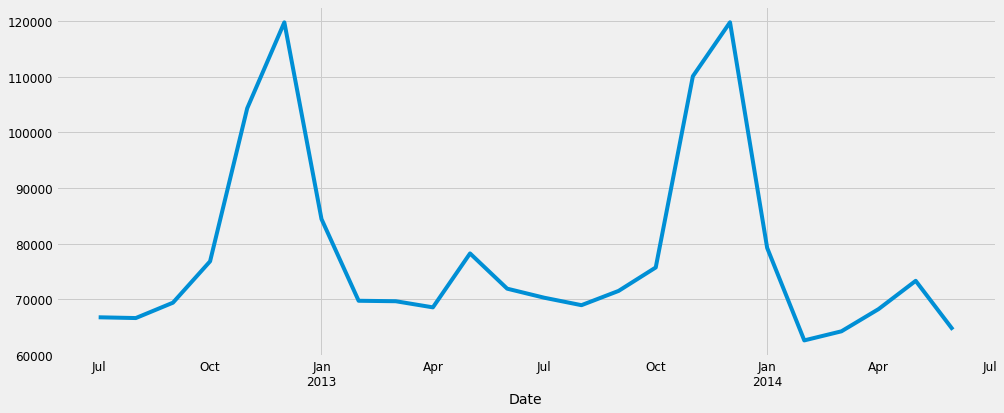

In [40]:
y.plot(figsize=(15, 6))
plt.show()

In [33]:
df_sales2 = df_sales.groupby(['quarter'])['Sales'].count().reset_index()
#df_sales2 = df_sales2.set_index('Date')
df_sales2
#y2 = df_sales2
#y2.plot(figsize=(15, 6))
#plt.show()

,quarter,Sales
0,1,1800
1,2,1660
2,3,1840
3,4,1840


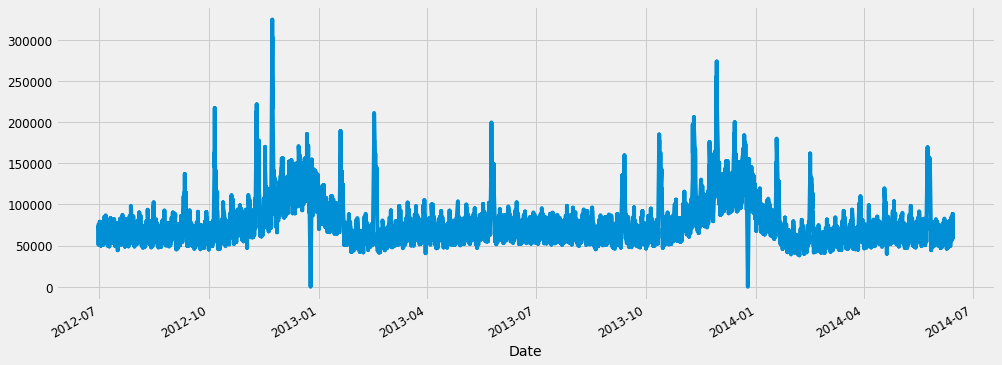

In [73]:
d2=df_sales['Sales']
d2.plot(figsize=(15, 6))
plt.show()

In [82]:
d2

Date
2012-07-01    76819.40
2012-07-01    63607.02
2012-07-01    64430.14
2012-07-01    61910.23
2012-07-01    60000.53
2012-07-01    64872.57
2012-07-01    51236.73
2012-07-01    71906.19
2012-07-01    57821.02
2012-07-01    73917.95
2012-07-02    61675.48
2012-07-02    66683.53
2012-07-02    52667.04
2012-07-02    78963.86
2012-07-02    63638.49
2012-07-02    75981.42
2012-07-02    73913.49
2012-07-02    59435.13
2012-07-02    65382.65
2012-07-02    66228.75
2012-07-03    62757.15
2012-07-03    58442.55
2012-07-03    56319.64
2012-07-03    63188.09
2012-07-03    74824.71
2012-07-03    60302.67
2012-07-03    61955.40
2012-07-03    70039.07
2012-07-03    49906.32
2012-07-03    71998.60
                ...   
2014-06-12    58095.30
2014-06-12    59944.36
2014-06-12    62384.26
2014-06-12    55985.00
2014-06-12    49609.79
2014-06-12    74380.12
2014-06-12    62812.64
2014-06-12    69622.92
2014-06-12    71570.80
2014-06-12    61587.27
2014-06-13    63587.38
2014-06-13    84480.43
2014-0

In [117]:
d1=df_sales[df_sales.Store == "Savannah"]


In [118]:
d3= d1.groupby(['Date'])['Sales'].mean()

Date
2012-07-01     73917.95
2012-07-02     75981.42
2012-07-03     71998.60
2012-07-04     75558.09
2012-07-05     73558.56
2012-07-06     81882.87
2012-07-07     83528.86
2012-07-08     75182.62
2012-07-09     71384.36
2012-07-10     70618.61
2012-07-11     80184.43
2012-07-12     78301.44
2012-07-13     76506.58
2012-07-14     78894.57
2012-07-15     71297.00
2012-07-16     74512.19
2012-07-17     64014.01
2012-07-18     73026.99
2012-07-19     79760.39
2012-07-20     73780.69
2012-07-21     83689.00
2012-07-22     80424.08
2012-07-23     70298.50
2012-07-24     72467.68
2012-07-25     79160.85
2012-07-26     70777.03
2012-07-27     82954.69
2012-07-28     94602.26
2012-07-29     76145.58
2012-07-30     82338.90
                ...    
2014-05-16     80391.59
2014-05-17     88148.46
2014-05-18     78577.00
2014-05-19     71447.96
2014-05-20     73575.86
2014-05-21     79495.87
2014-05-22     72819.50
2014-05-23     79181.35
2014-05-24    163047.34
2014-05-25    151578.68
2014-05-26 

In [116]:
d4=d1['Sales'].resample('MS').mean()
d4


# SERIES DECOMPOSITION

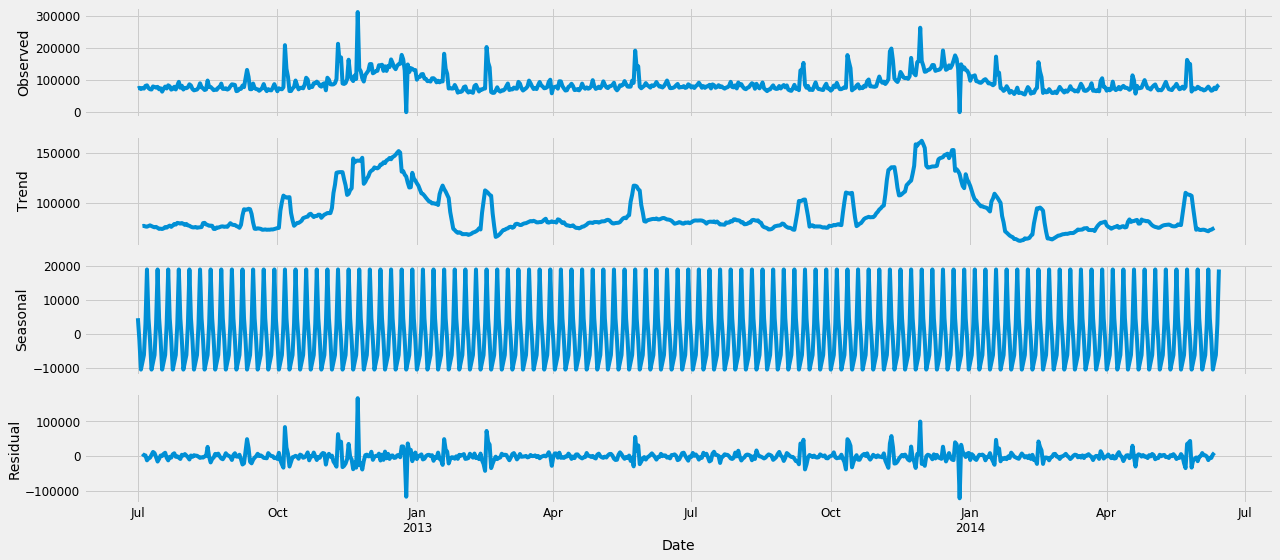

In [121]:

from pylab import rcParams
rcParams['figure.figsize'] = 18, 8
decomposition = sm.tsa.seasonal_decompose(d3, model="additive", filt=None, freq=None)
fig = decomposition.plot()
plt.show()

In [122]:

from pyramid.arima import auto_arima
stepwise_model = auto_arima(d3, start_p=1, start_q=1,
                           max_p=3, max_q=3, m=12,
                           start_P=0, seasonal=True,
                           d=1, D=1, trace=True,
                           error_action='ignore',  
                           suppress_warnings=True, 
                           stepwise=True)
print(stepwise_model.aic())

Fit ARIMA: order=(1, 1, 1) seasonal_order=(0, 1, 1, 12); AIC=16249.405, BIC=16272.167, Fit time=3.317 seconds
Fit ARIMA: order=(0, 1, 0) seasonal_order=(0, 1, 0, 12); AIC=16704.189, BIC=16713.294, Fit time=0.395 seconds
Fit ARIMA: order=(1, 1, 0) seasonal_order=(1, 1, 0, 12); AIC=16481.826, BIC=16500.036, Fit time=0.964 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(0, 1, 1, 12); AIC=16124.045, BIC=16142.255, Fit time=4.849 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(1, 1, 1, 12); AIC=16283.411, BIC=16306.173, Fit time=3.333 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(0, 1, 0, 12); AIC=16597.356, BIC=16611.014, Fit time=0.196 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(0, 1, 2, 12); AIC=16283.008, BIC=16305.770, Fit time=5.258 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(1, 1, 2, 12); AIC=16287.123, BIC=16314.438, Fit time=4.774 seconds
Fit ARIMA: order=(0, 1, 0) seasonal_order=(0, 1, 1, 12); AIC=16218.069, BIC=16231.727, Fit time=4.551 seconds
Fit ARIMA:

In [125]:


train = d3.loc['2012-07-01':'2014-01-01']
test = d3.loc['2014-01-01':]
#train, test = df_sales[df_sales.Date < '2014-01-01'], df_sales[df_sales.Date >= '2014-01-01']


In [126]:
stepwise_model.fit(train)

ARIMA(callback=None, disp=0, maxiter=50, method=None, order=(0, 1, 1),
   out_of_sample_size=0, scoring='mse', scoring_args={},
   seasonal_order=(0, 1, 1, 12), solver='lbfgs', start_params=None,
   suppress_warnings=True, transparams=True, trend='c')

In [130]:

future_forecast = stepwise_model.predict(n_periods=165)

In [131]:
future_forecast

array([120306.95523444, 119817.23067037, 128155.92224148, 127417.50482537,
       121381.69467714, 121821.18513955, 120405.33605871, 119300.57838567,
       121238.39650894, 119638.1649312 , 115704.86224782, 111476.43484737,
       118853.96850976, 118350.05054793, 126674.54872129, 125921.93790742,
       119871.93436143, 120297.23142608, 118867.18894748, 117748.23787668,
       119671.86260219, 118057.43762669, 114109.94154555, 109867.32074735,
       117230.66101198, 116712.54965239, 125022.85442798, 124256.05021635,
       118191.8532726 , 118602.9569395 , 117158.72106314, 116025.57659458,
       117935.00792233, 116306.38954907, 112344.70007018, 108087.88587421,
       115437.03274108, 114904.72798373, 123200.83936157, 122419.84175218,
       116341.45141067, 116738.36167981, 115279.93240569, 114132.59453937,
       116027.83246936, 114385.02069834, 110409.13782169, 106138.13022796,
       113473.08369707, 112926.58554196, 121208.50352204, 120413.31251489,
       114320.72877563, 1

In [132]:
import plotly.plotly as ply
import cufflinks as cf
from plotly.plotly import plot_mpl
future_forecast = pd.DataFrame(future_forecast,index = test.index,columns=['Prediction'])
pd.concat([test,future_forecast],axis=1).iplot()

In [133]:
pd.concat([y,future_forecast],axis=1).iplot()

In [135]:
p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]
print('Examples of parameter combinations for Seasonal ARIMA')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))


Examples of parameter combinations for Seasonal ARIMA
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)


In [136]:
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(d3,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            results = mod.fit()
            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue

ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:18362.581404605444
ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:17665.6726148625
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:16594.857805785636
ARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC:16152.282040680493
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:16597.11572556052
ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:16441.79216197633
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:16232.130653701766
ARIMA(0, 0, 0)x(1, 1, 1, 12)12 - AIC:16153.539572510697
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:17891.207955035024
ARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:17489.733203659438
ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:16473.02589417848
ARIMA(0, 0, 1)x(0, 1, 1, 12)12 - AIC:16004.873573342178
ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:17436.217646764097
ARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:17371.39661729343
ARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:16113.56707890764
ARIMA(0, 0, 1)x(1, 1, 1, 12)12 - AIC:16006.869613825007
ARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:16424.77545430167
ARIMA(0, 1, 0)x(0, 0, 1, 12)12 - AIC:16159.72829446307
A

In [141]:
mod = sm.tsa.statespace.SARIMAX(d3,
                                order=(0, 1, 1),
                                seasonal_order=(0, 1, 0, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results = mod.fit()
print(results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.7126      0.023    -31.368      0.000      -0.757      -0.668
sigma2      1.168e+09   1.55e-12   7.55e+20      0.000    1.17e+09    1.17e+09


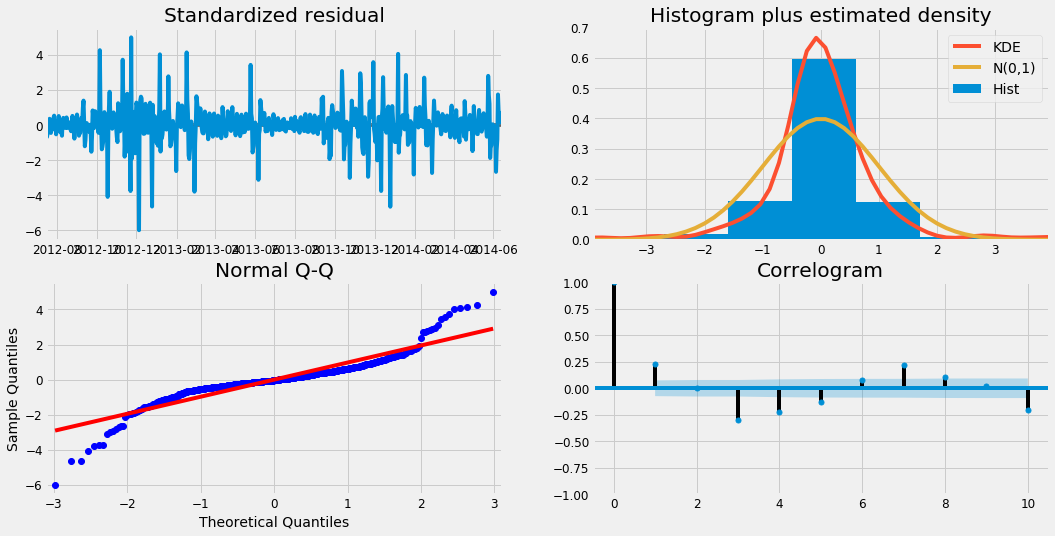

In [142]:
results.plot_diagnostics(figsize=(16, 8))
plt.show()

# DAILY sales prediction 

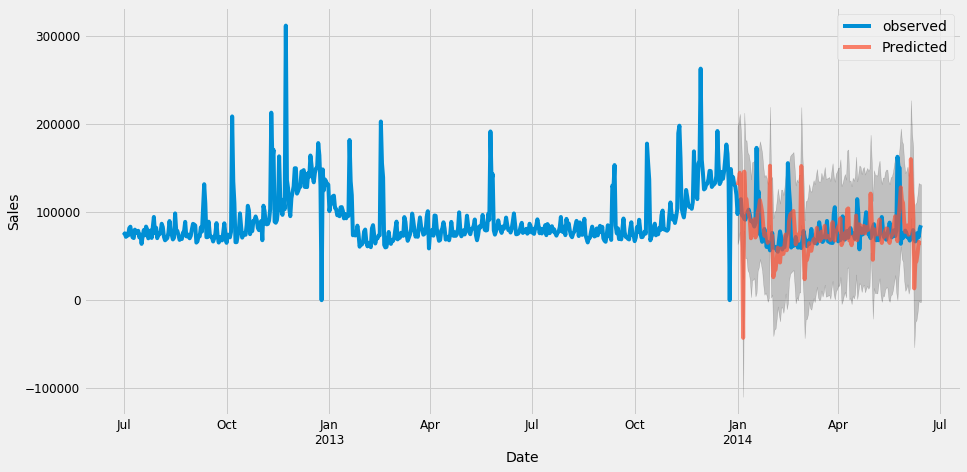

In [144]:
pred = results.get_prediction(start=pd.to_datetime('2014-01-01'), dynamic=False)
pred_ci = pred.conf_int()
ax = d3['2012':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='Predicted', alpha=.7, figsize=(14, 7))
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)
ax.set_xlabel('Date')
ax.set_ylabel('Sales')
plt.legend()
plt.show()

In [64]:
y_forecasted = pred.predicted_mean
y_truth = y['2014-01-01':]
mse = ((y_forecasted - y_truth) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))

The Mean Squared Error of our forecasts is 11723421.53


Date
2014-01-01    792643.391290
2014-02-01    626395.292857
2014-03-01    642706.079677
2014-04-01    682631.366333
2014-05-01    733420.281290
2014-06-01    645734.861429
Freq: MS, Name: Sales, dtype: float64

# FORECAST

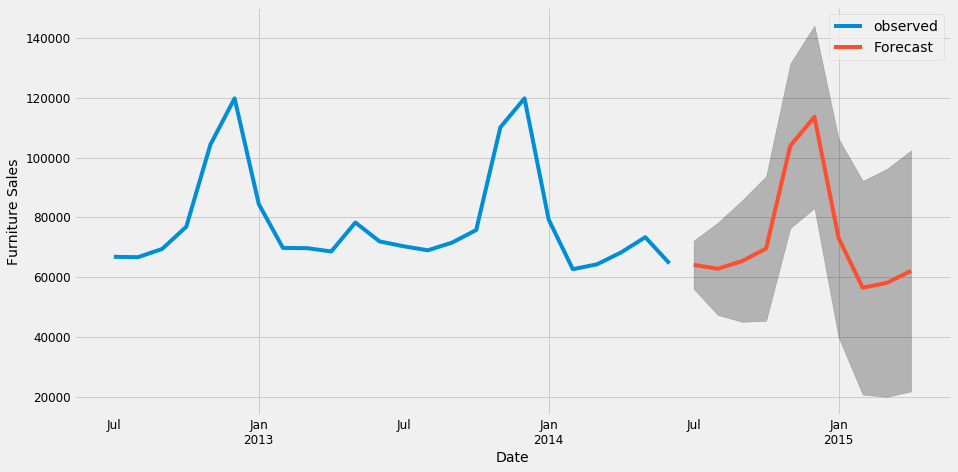

In [65]:
pred_uc = results.get_forecast(steps=10)
pred_ci = pred_uc.conf_int()
ax = y.plot(label='observed', figsize=(14, 7))
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.25)
ax.set_xlabel('Date')
ax.set_ylabel('Furniture Sales')
plt.legend()
plt.show()